# Pythonチャレンジ: 地震データを探る

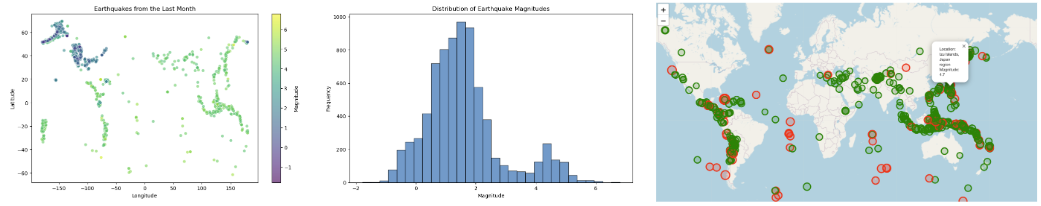

目的: Pythonを使ってUSGS（アメリカ地質調査所）のリアルタイム地震APIから最新の地震データを取得し、意味のある分析を行います。このチャレンジの最終目標は、世界中の地震を視覚化することです。

## 始めに

参考リンク：

- USGS 地震プログラム ホームページ: https://www.usgs.gov/programs/earthquake-hazards/earthquakes
- リアルタイムCSVデータ（スプレッドシート）API: https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php

データの取得: USGSのリアルタイム地震APIを使用して、最新の地震データを取得します。APIの基本URLは以下の通りです：

https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv

以下のPythonスクリプトを作成して：
- APIにリクエストを送信。
- csv形式のレスポンスを解析し、各地震の位置、マグニチュード、深さ、発生時刻などの情報を抽出します。

### リクエストコード例

In [4]:
import pandas as pd
import requests

# USGSから過去1か月の地震データを取得
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
response = requests.get(url)

# データをファイルに保存
with open('earthquakes.csv', 'wb') as file:
    file.write(response.content)

# データをDataFrameに読み込む
data = pd.read_csv('earthquakes.csv')

# データの最初の5行を表示
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-11-12T04:58:07.328Z,61.575000,-147.886700,24.70,1.70,ml,NaN,NaN,NaN,0.66,...,2025-11-12T04:59:43.816Z,"28 km SSW of Glacier View, Alaska",earthquake,NaN,0.200,NaN,NaN,automatic,ak,ak
1,2025-11-12T04:57:17.298Z,31.463000,-104.346000,0.00,1.50,ml,12.0,249.0,0.20000,0.90,...,2025-11-12T05:00:19.335Z,"55 km WNW of Toyah, Texas",earthquake,0.00,NaN,0.200,7.0,automatic,tx,tx
2,2025-11-12T04:55:26.200Z,33.384833,-116.303167,12.05,1.02,ml,69.0,22.0,0.02304,0.20,...,2025-11-12T04:58:54.540Z,"16 km NNE of Borrego Springs, CA",earthquake,0.16,0.480,0.162,26.0,automatic,ci,ci
3,2025-11-12T04:38:39.960Z,-41.061500,-91.515500,10.00,4.90,mb,43.0,148.0,13.77000,1.08,...,2025-11-12T04:56:50.040Z,southeast of Easter Island,earthquake,13.27,1.913,0.050,129.0,reviewed,us,us
4,2025-11-12T04:37:44.436Z,57.388400,-155.478300,113.40,2.10,ml,NaN,NaN,NaN,0.54,...,2025-11-12T04:46:07.624Z,"64 km WSW of Karluk, Alaska",earthquake,NaN,0.900,NaN,NaN,automatic,ak,ak


## チャレンジ

**チャレンジ1: データの取得と表示**

APIから地震データを取得し、以下を表示：
- 過去1ヶ月に報告された地震の総数
- 最大マグニチュードの地震とその発生場所と日にち
- 日本での地震の数

In [2]:
import pandas as pd

url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"

try:
    df = pd.read_csv(url)
except Exception as e:
    print(f"❌ データの読み込み中にエラーが発生しました: {e}")
    exit()

total_earthquakes = len(df)

max_mag_eq = df.loc[df['mag'].idxmax()]

japan_earthquakes = df['place'].str.contains('Japan|日本', case=False, na=False).sum()

print("--- 過去1ヶ月の地震分析結果 ---")
print(f"1. 報告された地震の総数: {total_earthquakes} 件")
print("-" * 30)

print("2. 最大マグニチュードの地震:")
print(f"   - マグニチュード: {max_mag_eq['mag']}")
print(f"   - 発生場所: {max_mag_eq['place']}")
# 'time'カラムはUTC形式の文字列なので、日付だけを抽出
occurrence_date = pd.to_datetime(max_mag_eq['time']).strftime('%Y年%m月%d日 (UTC)')
print(f"   - 発生日にち: {occurrence_date}")
print("-" * 30)

print(f"3. 日本付近での地震の数: {japan_earthquakes} 件")

--- 過去1ヶ月の地震分析結果 ---
1. 報告された地震の総数: 7365 件
------------------------------
2. 最大マグニチュードの地震:
   - マグニチュード: 6.8
   - 発生場所: 126 km E of Yamada, Japan
   - 発生日にち: 2025年11月09日 (UTC)
------------------------------
3. 日本付近での地震の数: 95 件


**チャレンジ2: 重要な地震のフィルタリング**

- マグニチュードが6.0を超える地震をフィルタリングし、`for` ループを使って以下をリストアップ：
    - その位置、マグニチュード、発生時刻
    - このような重要な地震の総数


In [3]:
import pandas as pd

url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
try:
    df = pd.read_csv(url)
except Exception:
    print("❌ データの読み込みに失敗しました。URLまたは接続を確認してください。")
    exit()

significant_eqs = df[df['mag'] > 6.0].copy()

print("\n--- マグニチュード 6.0 超の地震一覧 ---")
significant_count = 0

for index, row in significant_eqs.iterrows():
    time_utc = pd.to_datetime(row['time']).strftime('%Y/%m/%d %H:%M:%S UTC')
    
    place = row['place']
    magnitude = row['mag']
    
    print(f"\n場所: {place}")
    print(f"  - マグニチュード: M{magnitude}")
    print(f"  - 発生時刻: {time_utc}")
    
    significant_count += 1

print("-" * 30)
print(f"マグニチュード 6.0 を超える地震の総数: {significant_count} 件")


--- マグニチュード 6.0 超の地震一覧 ---

場所: 121 km E of Yamada, Japan
  - マグニチュード: M6.4
  - 発生時刻: 2025/11/09 08:54:36 UTC

場所: 126 km E of Yamada, Japan
  - マグニチュード: M6.8
  - 発生時刻: 2025/11/09 08:03:37 UTC

場所: 155 km SE of Petropavlovsk-Kamchatsky, Russia
  - マグニチュード: M6.1
  - 発生時刻: 2025/11/03 08:44:43 UTC

場所: 22 km WSW of Khulm, Afghanistan
  - マグニチュード: M6.3
  - 発生時刻: 2025/11/02 20:29:02 UTC

場所: Banda Sea
  - マグニチュード: M6.4
  - 発生時刻: 2025/10/28 14:40:18 UTC

場所: 162 km E of Beauséjour, Guadeloupe
  - マグニチュード: M6.5
  - 発生時刻: 2025/10/27 12:38:40 UTC

場所: 57 km NW of Pante Makasar, Timor Leste
  - マグニチュード: M6.2
  - 発生時刻: 2025/10/26 17:04:25 UTC
------------------------------
マグニチュード 6.0 を超える地震の総数: 7 件


**チャレンジ3: 地震の深さを分析**

- すべての地震の平均深度を計算してください。
- 地震を以下のカテゴリに分類し、それぞれの数を数えてください：
    - 浅い地震 (<70 km)
    - 中間深度地震 (70–300 km)
    - 深い地震 (>300 km)


In [5]:
import pandas as pd

url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
try:
    df = pd.read_csv(url)
except Exception:
    print("❌ データの読み込みに失敗しました。URLまたは接続を確認してください。")
    exit()

average_depth = df['depth'].mean()

print("--- 地震深度の分析結果 ---")
print(f"1. すべての地震の平均深度: {average_depth:.2f} km")
print("-" * 30)

def classify_depth(depth):
    if depth < 70:
        return '浅い地震 (<70 km)'
    elif depth <= 300:
        return '中間深度地震 (70–300 km)'
    else: 
        return '深い地震 (>300 km)'

df['Depth Category'] = df['depth'].apply(classify_depth)

category_counts = df['Depth Category'].value_counts()

print("2. 深度カテゴリごとの地震数:")
for category, count in category_counts.items():
    print(f"   - {category}: {count} 件")

--- 地震深度の分析結果 ---
1. すべての地震の平均深度: 21.47 km
------------------------------
2. 深度カテゴリごとの地震数:
   - 浅い地震 (<70 km): 6798 件
   - 中間深度地震 (70–300 km): 510 件
   - 深い地震 (>300 km): 56 件


**チャレンジ4: 時間分析**

- 地震のタイムスタンプ（ミリ秒単位のUNIX時間）を人間が読みやすい形式に変換して、日本時間として表示
- データセット内の最も早い地震と最新の地震の発生時刻を見つけてください。

In [6]:
import pandas as pd

url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
try:
    df = pd.read_csv(url)
except Exception:
    print("❌ データの読み込みに失敗しました。URLまたは接続を確認してください。")
    exit()

df['datetime_utc'] = pd.to_datetime(df['time'])

df['datetime_jst'] = df['datetime_utc'].dt.tz_convert('Asia/Tokyo')

print("--- タイムスタンプの変換例 ---")
print(df[['time', 'datetime_utc', 'datetime_jst']].head(3))
print("-" * 50)

earliest_eq = df['datetime_jst'].min()
latest_eq = df['datetime_jst'].max()

print("地震データの期間")
print(f"最も早い地震の発生時刻 (JST): {earliest_eq.strftime('%Y年%m月%d日 %H:%M:%S JST')}")
print(f"最新の地震の発生時刻 (JST): {latest_eq.strftime('%Y年%m月%d日 %H:%M:%S JST')}")

--- タイムスタンプの変換例 ---
                       time                     datetime_utc  \
0  2025-11-17T06:22:21.169Z 2025-11-17 06:22:21.169000+00:00   
1  2025-11-17T06:19:11.810Z 2025-11-17 06:19:11.810000+00:00   
2  2025-11-17T06:18:54.470Z 2025-11-17 06:18:54.470000+00:00   

                      datetime_jst  
0 2025-11-17 15:22:21.169000+09:00  
1 2025-11-17 15:19:11.810000+09:00  
2 2025-11-17 15:18:54.470000+09:00  
--------------------------------------------------
地震データの期間
最も早い地震の発生時刻 (JST): 2025年10月18日 15:53:58 JST
最新の地震の発生時刻 (JST): 2025年11月17日 15:22:21 JST


**チャレンジ5: 地震のマグニチュードを視覚化**

- 以下をプロットする棒グラフまたは散布図を作成してください：
    - x軸に地震のマグニチュード。
    - y軸に深さ。
    - 最大の地震と最も深い地震にラベルを追加。

C:\Users\matin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28145 (\N{CJK UNIFIED IDEOGRAPH-6DF1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\matin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12373 (\N{HIRAGANA LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\matin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36942 (\N{CJK UNIFIED IDEOGRAPH-904E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\matin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21435 (\N{CJK UNIFIED IDEOGRAPH-53BB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\matin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: Us

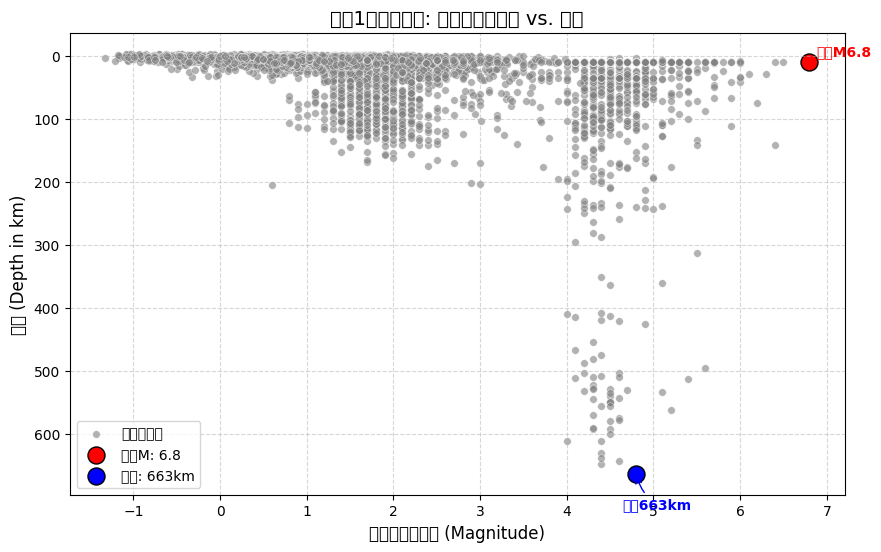


プロットを生成しました。グラフウィンドウまたは出力エリアを確認してください。


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
try:
    df = pd.read_csv(url)
except Exception:
    print("❌ データの読み込みに失敗しました。URLまたは接続を確認してください。")
    exit()

max_mag_index = df['mag'].idxmax()
max_mag_eq = df.loc[max_mag_index]

deepest_eq_index = df['depth'].idxmax()
deepest_eq = df.loc[deepest_eq_index]

plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='mag', 
    y='depth', 
    data=df, 
    alpha=0.6, 
    s=30, 
    color='gray',
    label='全ての地震'
)
plt.scatter(
    max_mag_eq['mag'], 
    max_mag_eq['depth'], 
    color='red', 
    s=150, 
    edgecolor='black', 
    label=f"最大M: {max_mag_eq['mag']}"
)
plt.annotate(
    f"最大M{max_mag_eq['mag']:.1f}", 
    (max_mag_eq['mag'], max_mag_eq['depth']), 
    xytext=(5, 5), 
    textcoords='offset points', 
    color='red', 
    fontsize=10, 
    fontweight='bold'
)
plt.scatter(
    deepest_eq['mag'], 
    deepest_eq['depth'], 
    color='blue', 
    s=150, 
    edgecolor='black', 
    label=f"最深: {deepest_eq['depth']:.0f}km"
)
plt.annotate(
    f"最深{deepest_eq['depth']:.0f}km", 
    (deepest_eq['mag'], deepest_eq['depth']), 
    xytext=(-10, -25), 
    textcoords='offset points', 
    color='blue', 
    fontsize=10, 
    fontweight='bold', 
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2", color='blue')
)

plt.gca().invert_yaxis()

plt.title('過去1ヶ月の地震: マグニチュード vs. 深さ', fontsize=14)
plt.xlabel('マグニチュード (Magnitude)', fontsize=12)
plt.ylabel('深さ (Depth in km)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower left')
plt.show()

print("\nプロットを生成しました。グラフウィンドウまたは出力エリアを確認してください。")

**チャレンジ6（上級）: 地震のグローバルマップ作成**

- foliumまたはmatplotlibなどのマッピングライブラリを使用して、すべての地震を地図上にプロットしてください。
- 以下の特徴を追加してください：
    - 地震の位置をポイントで表示。
    - マグニチュードに基づいてポイントを色分け（例：<4.0は緑、4.0–6.0は黄色、>6.0は赤）。
    - ポイントにマウスを重ねると、地震の位置、マグニチュード、日本日付、深さを表示するツールチップを追加。

In [1]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import numpy as np

url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
try:
    df = pd.read_csv(url)
except Exception:
    print("❌ データの読み込みに失敗しました。URLまたは接続を確認してください。")
    exit()

df['datetime_utc'] = pd.to_datetime(df['time'])
df['datetime_jst'] = df['datetime_utc'].dt.tz_convert('Asia/Tokyo')

def get_color(magnitude):
    """マグニチュードに基づいて色を返す"""
    if magnitude > 6.0:
        return 'red'      
    elif magnitude >= 4.0:
        return 'orange'   
    else:
        return 'green'    

m = folium.Map(location=[0, 0], zoom_start=2)
marker_cluster = MarkerCluster().add_to(m)

for index, row in df.iterrows():
    mag = row['mag']
    lat = row['latitude']
    lon = row['longitude']
    depth = row['depth']
    
    if np.isnan(lat) or np.isnan(lon) or np.isnan(mag):
        continue
    
    color = get_color(mag)
    
    tooltip_html = f"""
    <b>場所:</b> {row['place']}<br>
    <b>マグニチュード:</b> M{mag:.1f}<br>
    <b>発生日時 (JST):</b> {row['datetime_jst'].strftime('%Y/%m/%d %H:%M:%S')}<br>
    <b>深さ:</b> {depth:.1f} km
    """

    folium.CircleMarker(
        location=(lat, lon),
        radius=max(mag * 1.5, 2), 
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        tooltip=tooltip_html 
    ).add_to(marker_cluster)

map_path = 'earthquake_map_week6_final.html'
m.save(map_path)

print(f" 地図のプロットが完了しました。ファイル'{map_path}'が作成されました。")
print("このHTMLファイルをブラウザで開いて、インタラクティブな地図を確認してください。")

 地図のプロットが完了しました。ファイル'earthquake_map_week6_final.html'が作成されました。
このHTMLファイルをブラウザで開いて、インタラクティブな地図を確認してください。


# 課題提出

### Theme: Impact Visualization Challenge
USGSのライブ地震データを使って、**Impact** を感じる可視化や分析を作ってください。  
自分で考えて、探して、形にしてください。説明や手順はありません。

---

### How to Begin
1. **VS Code** を開く  
2. 自分の **GitHub「me」リポジトリ** の中に **新しいフォルダ** を作成 → 名前は **Week6**  
3. その中に **earthquake.ipynb** というファイルを作る  
4. **Markdown cell** を追加して、タイトルと自分の作品の説明を書く  
5. **Code cell** を追加し、ライブラリと **USGS データ** をインポートする（授業で使ったコードをコピー）  
6. さらに自分の **code cells** を追加して、可視化や分析を完成させる  

---

### 提出内容
- **Jupyter Notebook (.ipynb)**（code cells と markdown cells を含む）  
- **図または地図**（image または HTML）  
- **日本語サマリー（200〜400字）**：やったこと・わかったこと・感じたこと  

---

### 提出方法
成果物を **GitHub** にコミットし、`.ipynb` への **direct link** を **UNIPA** に提出。  
ファイルのアップロードは禁止。

---

### 評価
- **9–10：素晴らしい**  
- **7–8：ま〜ま〜**  
- **6：ギリOK**  
- **0：未提出**